<a href="https://colab.research.google.com/github/tnatani/Health-Insurance-Cross-Sell-Prediction/blob/main/Copy_of_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

**Loading dataset and having first view**

In [5]:
# MOUNTING THE GOOGLE DRIVE

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')


In [8]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [9]:
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


**Exploratory Data Analysis and Data Preprocessing**

In [10]:
# CHECKING THE SHAPE OF OUR DATASET

df.shape

(381109, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


1.some of the object will need an encoding before processing to the machine learning modeling


2.id column will be dropped because it will not affect anything in our analysis and machine learning process


In [12]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

With this, we can say that there are no null values present in our dataset.

In [13]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000



1. The average customers vintage (numbers of day been insured in the compant is 154 days)
2. No customers in this data set have been with the insurance company for 1 full year
3. The oldest customers in this dataset is 85 while the median is 36 
4. The most expensive annual premium is almost 17 times more expensive compared to the median annual premium
5.This data definitely need a scalling to get a better result in the machine learning process 

In [14]:
df.describe(include = 'O')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


## Majority of the health insurance owner is male

In [15]:
## knowing all the unique value in the columns 
df_unique = df.drop(columns = 'id')

for column in df_unique.columns:
    print(f"{column}: ")
    print("")
    print(df_unique[column].unique())
    print("")

Gender: 

['Male' 'Female']

Age: 

[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]

Driving_License: 

[1 0]

Region_Code: 

[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]

Previously_Insured: 

[0 1]

Vehicle_Age: 

['> 2 Years' '1-2 Year' '< 1 Year']

Vehicle_Damage: 

['Yes' 'No']

Annual_Premium: 

[ 40454.  33536.  38294. ...  20706. 101664.  69845.]

Policy_Sales_Channel: 

[ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.  42.  83. 136.  24.  18.  56.  48.
 106.  54

#Handling null values, Handling outliers, and encoding process

In [16]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

## apparently there is no null value in all the rows and columns so we dont need to do anything about it for now.

In [17]:
df.drop(columns = 'id', inplace = True)

In [18]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# id wont be needed in the analysis and it wont be needed for the machine learning process so it's kind of redundant to keep it

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

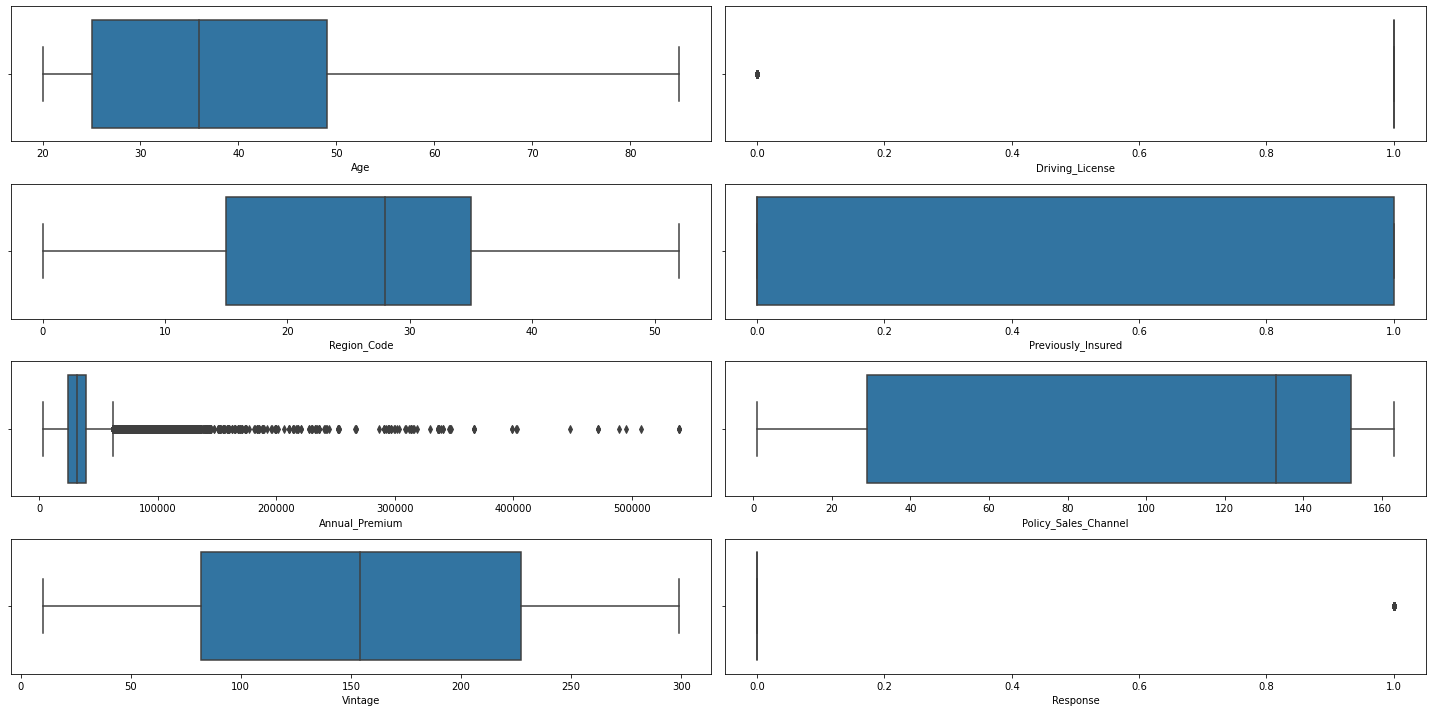

In [19]:
## Looking at the box plot to check all the outliers 
plt.figure(figsize = (20, 10))
x = 1 

for column in df.describe().columns:
    plt.subplot(4,2, x)
    sns.boxplot(df[column])
    x+=1 

plt.tight_layout()
plt.show()


1.From the boxplot below we can see that there's a lot of outliers in the annual premium.

2.This will need to be scaled with robust scaler to better the eva matrix / binning.

3.We will not removing the outliers of annual premium since it might hold valueable information related to response.

4.driving license because it's binary categorical there wouldn't be any outliers

**Encoding Object columns**

**Encoding Gender**

In [20]:
df['Gender'] = df['Gender'].map({'Female':1, 'Male':0})
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,0,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,0,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,0,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,1,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


**Encoding Vehicle_Damage**

In [21]:
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes':1, 'No':0})
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,0,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,0,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,0,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,1,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


**Encoding Vehicle_Age**

In [22]:
df['Vehicle_Age'] = df['Vehicle_Age'].map({'1-2 Year':1, '< 1 Year':0, '> 2 Years': 2})
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,1,29,1,41.0,1,0,0,27496.0,152.0,39,0


#Mini EDA**

**Hypothesis Null**



*  Gender is Corelated With Response
*  Age is Correlated with Response
*  Driving License is correlated with respponse
*  Previosly_Insured correlated with response
*  Vehicle_Age is correlated with response
*  Vehicle Damage is Correlated with response
*  Anuual_Premium
*  Vintage is Correlated with response



In [23]:
df['Gender'].value_counts()

0    206089
1    175020
Name: Gender, dtype: int64

# There are more male in this dataset compared to female

In [25]:
pd.crosstab(index = df['Gender'], columns = df['Response'], normalize = 'index')

Response,0,1
Gender,,
0,0.861589,0.138411
1,0.896098,0.103902


# Dataset contain more male  than female so from perspective according to gender are equal

In [26]:
pd.crosstab(index = df['Age'], columns = df['Response'], normalize = 'columns').sort_values(1, ascending = False)

Response,0,1
Age,,
44,0.019575,0.038771
43,0.019833,0.038643
45,0.019163,0.038000
46,0.018457,0.036545
42,0.019007,0.035346
...,...,...
81,0.000156,0.000086
82,0.000084,0.000021
83,0.000063,0.000021


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


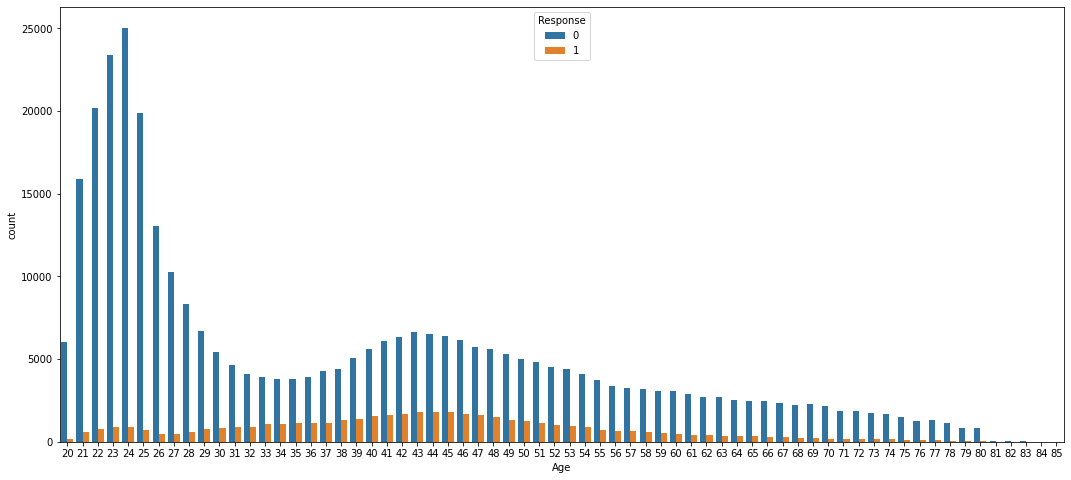

In [27]:
plt.figure(figsize = (18, 8))
sns.countplot(df['Age'], hue = df['Response'])

**Observation **

1.People ages between from 38 to 50 are more likely to respond.

2.While people ages between 20 to 30 are less likely to respond.

In [28]:
df['Driving_License'].value_counts(normalize= True)

1    0.997869
0    0.002131
Name: Driving_License, dtype: float64

The number of people who doesn't have a driving license is very small in this dataset

In [29]:
pd.crosstab(index = df['Driving_License'], columns = df['Response'], normalize = 'index')

Response,0,1
Driving_License,,
0,0.949507,0.050493
1,0.877283,0.122717


 Since More most of the people has a driving license, majoriity of the response that say yes are from people who has driving license

In [30]:
df['Previously_Insured'].value_counts(normalize = True)

0    0.54179
1    0.45821
Name: Previously_Insured, dtype: float64

In [31]:
pd.crosstab(index = df['Previously_Insured'], columns = df['Response'], normalize = 'index')

Response,0,1
Previously_Insured,,
0,0.774546,0.225454
1,0.999095,0.000905


People who previously Insured are less likely to response compared to people who was not previously insured

In [32]:
pd.crosstab(index = df['Vehicle_Age'], columns = df['Response'], normalize = 'columns')

Response,0,1
Vehicle_Age,,
0,0.471245,0.154185
1,0.494948,0.745151
2,0.033807,0.100664


 0  = Vehicle age < 1 year
# 1 = Vehicle age 1 - 2 year
# 2 = Vehicle Age > 2 years

# people that has vehicle for more than 2 years are more likely to response 
# people whos has newer vehicle are less likely to response 

In [33]:
pd.crosstab(index = df['Vehicle_Damage'], columns = df['Response'], normalize = 'index')


Response,0,1
Vehicle_Damage,,
0,0.994796,0.005204
1,0.762345,0.237655



1.Peeople who has a vehicle damage are more likely to response since they know the concequences.


2.People who don't have a vehicle Damage Are less likely to response 

In [34]:
pd.crosstab(index = df['Response'], columns = 'Test', values = df['Annual_Premium'], aggfunc = 'median')

col_0,Test
Response,
0,31504.0
1,33002.0


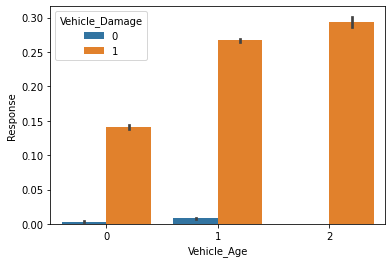

In [35]:
sns.barplot(x = df['Vehicle_Age'], y= df['Response'], hue = df['Vehicle_Damage'])

1. Customer who has more than 2 years car age has a more likely to have vehicle damage and more likely to response to vehicle insurance

2. Customer who has a vehicle damage are more like to response to Insurance as well

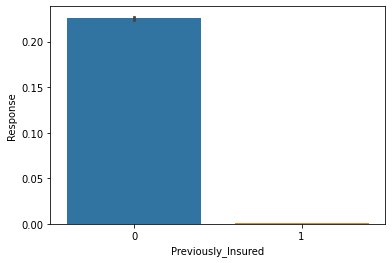

In [36]:
sns.barplot(x = df['Previously_Insured'], y = df['Response'])


Customer who was not previously insured are more likely to respond  to the vehicle insurance compared to the customer who was previously insured

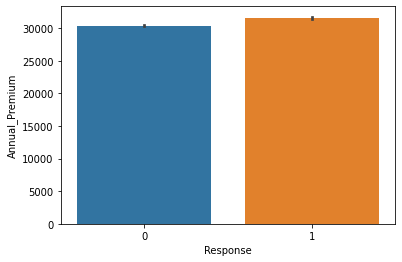

In [37]:
sns.barplot(x = 'Response', y ='Annual_Premium', data = df)

People who response have slightly higher annual premium 